In [12]:
import pandas as pd

# Load the main population data file
data_path = "API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv"
df = pd.read_csv(data_path, skiprows=4)

# Display the first few rows and column names
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


C:\Users\Kunal\AppData\Local\Temp\ipykernel_36556\3301062625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2023', y='Country Name', data=top10, palette='viridis')


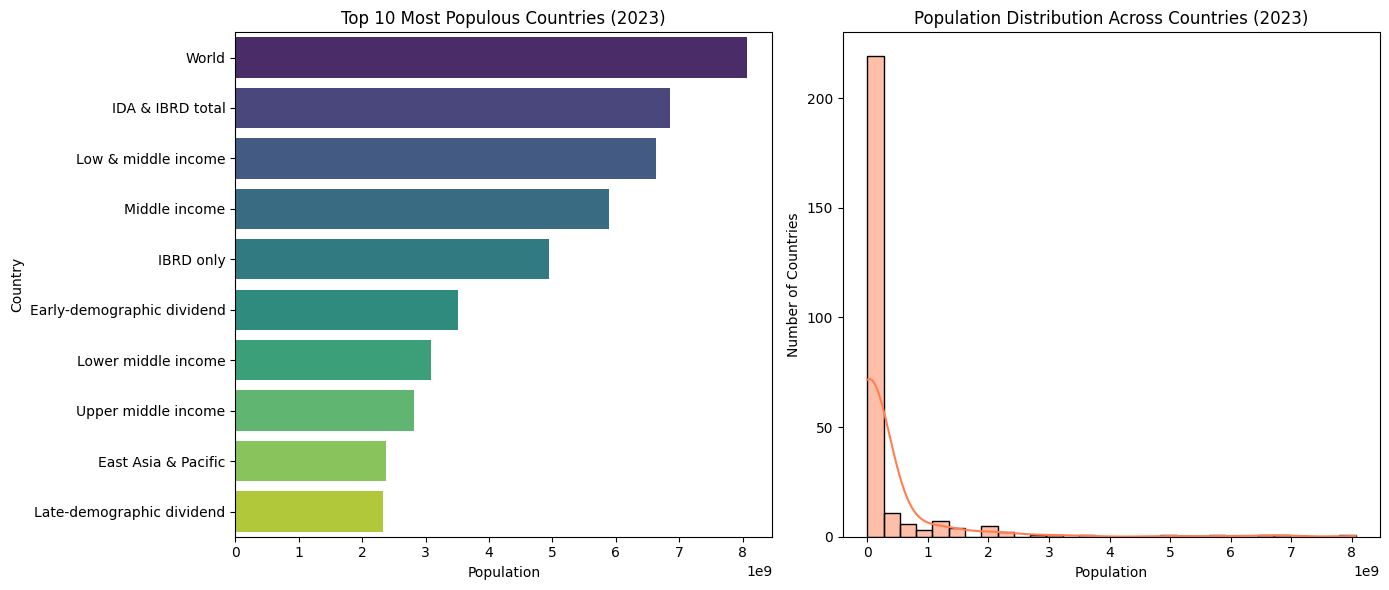

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the dataset: drop rows with NaN in 2023 and convert population to numeric
df_clean = df[['Country Name', '2023']].dropna()
df_clean['2023'] = pd.to_numeric(df_clean['2023'])

# Top 10 countries by population in 2023
top10 = df_clean.sort_values(by='2023', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 6))

# Bar chart for top 10 populous countries
plt.subplot(1, 2, 1)
sns.barplot(x='2023', y='Country Name', data=top10, palette='viridis')
plt.title('Top 10 Most Populous Countries (2023)')
plt.xlabel('Population')
plt.ylabel('Country')

# Histogram of population distribution
plt.subplot(1, 2, 2)
sns.histplot(df_clean['2023'], bins=30, kde=True, color='coral')
plt.title('Population Distribution Across Countries (2023)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')

plt.tight_layout()
plt.show()


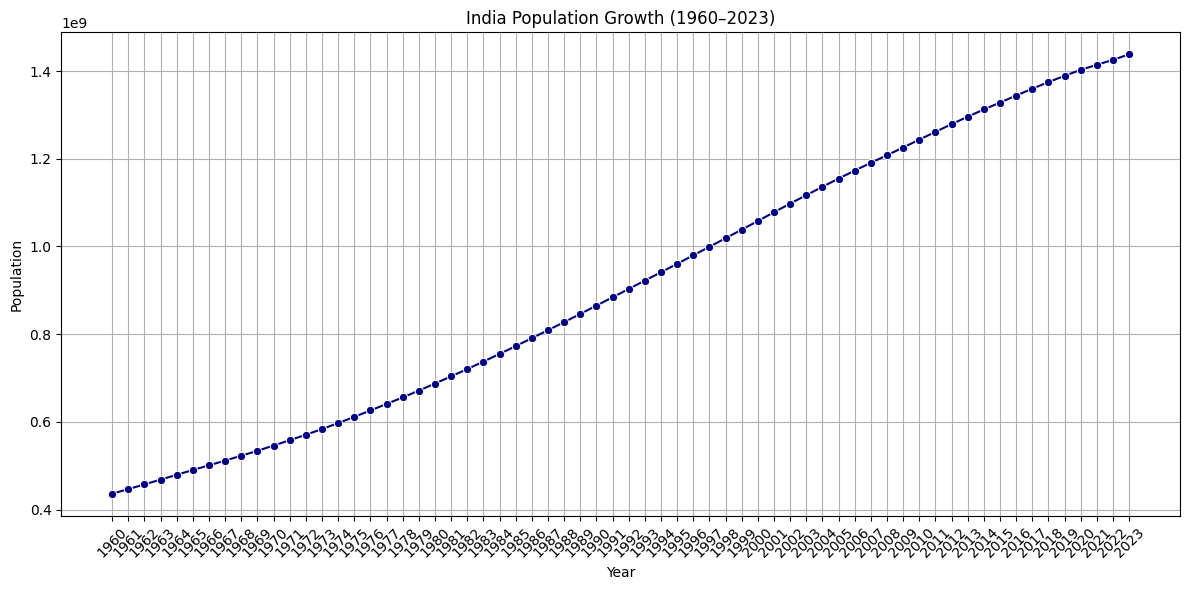

In [15]:
# Filter data for India
india_pop = df[df['Country Name'] == 'India'].iloc[0, 4:-1]  # Exclude metadata columns

# Convert index (years) to integers and values to numeric
india_pop.index = india_pop.index.astype(str)
india_pop = india_pop.apply(pd.to_numeric, errors='coerce')

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=india_pop.index, y=india_pop.values, marker='o', color='darkblue')
plt.xticks(rotation=45)
plt.title('India Population Growth (1960–2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()
